(2234, 3456, 3)


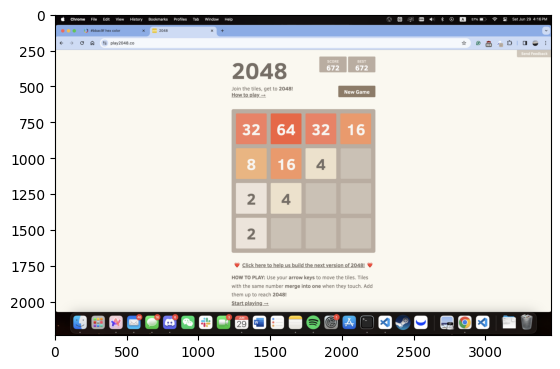

In [1]:
from PIL import Image, ImageGrab 
from matplotlib import pyplot as plt
import numpy as np
    
# image = np.asarray(ImageGrab.grab(bbox = None))[:, :, :3]
image = np.asarray(Image.open('2048.png'), dtype=np.int32)[:, :, :3]
print(image.shape)

plt.imshow(image)

In [2]:
color_dict = {
    (201, 193, 181) : 0,
    (236, 228, 219) : 2,
    (237, 223, 200) : 4,
    (243, 178, 121) : 8,
    (246, 149, 99) : 16,
    (247, 124, 95) : 32,
    (247, 95, 59) : 64,
    (237, 207, 114) : 128,
    (237, 204, 97) : 256,
    (237, 199, 80) : 512,
    (237, 196, 63) : 1024,
    (237, 194, 45) : 2048,
}
colors = color_dict.keys()
back_color = (250, 248, 239)
wall_color = (187, 172, 159)

In [3]:
def compare_color (a, b):
    return abs(a[0] - b[0]) < 7 and abs(a[1] - b[1]) < 7 and abs(a[2] - b[2]) < 7

[662, 1239]


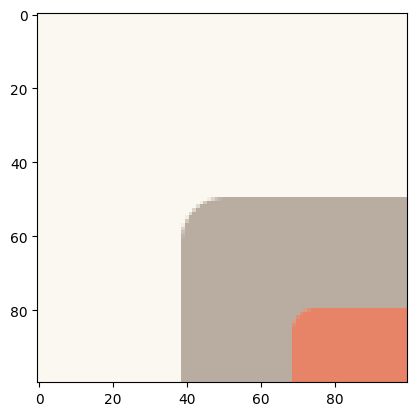

In [4]:
top_left = [0, 0]
found = False
for j in range(image.shape[1]):
    for i in range(1, image.shape[0]):
        if (compare_color(image[i - 1, j], back_color) and compare_color(image[i, j], wall_color)):
            top_left = [i, j]
            found = True
    if (found):
        break

print(top_left)
plt.imshow(image[top_left[0] - 50: top_left[0] + 50, top_left[1] - 50: top_left[1] + 50])

In [5]:
top_right = top_left.copy()
bottom_left = top_left.copy()

while compare_color(image[top_right[0], top_right[1]], back_color):
    top_right[1]+=1

while compare_color(image[bottom_left[0], bottom_left[1]], back_color):
    bottom_left[0]+=1


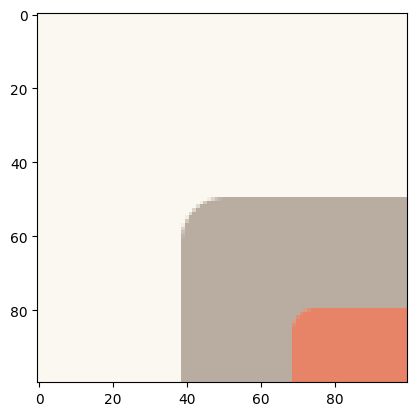

In [6]:
plt.imshow(image[top_right[0] - 50: top_right[0] + 50, top_right[1] - 50: top_right[1] + 50])

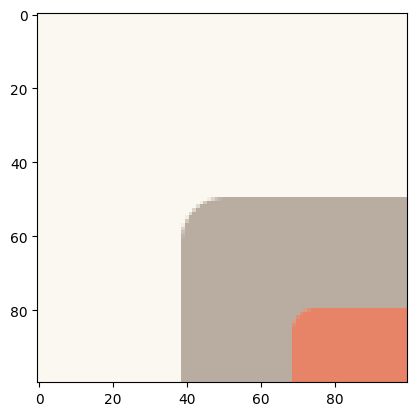

In [7]:
plt.imshow(image[bottom_left[0] - 50: bottom_left[0] + 50, bottom_left[1] - 50: bottom_left[1] + 50])